## Download and Explore Toronto geographical coordinates

### Downloading all the dependencies

In [21]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# conda install -c anaconda beautiful-soup --yes
from bs4 import BeautifulSoup # package for parsing HTML and XML documents

import csv # implements classes to read and write tabular data in CSV form
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-2.2.2               |           py35_1         462 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         560 KB

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-

## Web scrapping of Canada's postal codes from Wikipedia 

In [19]:


source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(source,'lxml')

table = soup.find('table',class_='wikitable sortable')
A=[]
B=[]
C=[]


for row in table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
df=pd.DataFrame(A,columns=['Postcode'])
df['Borough']=B
df['Neighbourhood']=C
df.drop(df[df['Borough'] == "Not assigned"].index,axis=0,inplace=True)
df.head()

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights


## Filtering data to Downtown Toronto - which is our main area of working 

In [83]:
df2 = df.query('Borough == "Downtown Toronto"').reset_index(drop=True)
df2.head()

,Postcode,Borough,Neighbourhood
0,M5A,Downtown Toronto,Harbourfront
1,M5A,Downtown Toronto,Regent Park
2,M5B,Downtown Toronto,Ryerson
3,M5B,Downtown Toronto,Garden District
4,M5C,Downtown Toronto,St. James Town


### Combine same postal codes by moving neighbouhoods in same row; separated by commas

In [86]:

df3=df2.groupby(['Postcode', 'Borough'])['Neighbourhood'].apply(', '.join).reset_index()
df3['Neighbourhood']=df3['Neighbourhood'].replace(to_replace='\n', value='', regex=True)
df3

,Postcode,Borough,Neighbourhood
0,M4W,Downtown Toronto,Rosedale
1,M4X,Downtown Toronto,"Cabbagetown, St. James Town"
2,M4Y,Downtown Toronto,Church and Wellesley
3,M5A,Downtown Toronto,"Harbourfront, Regent Park"
4,M5B,Downtown Toronto,"Ryerson, Garden District"
5,M5C,Downtown Toronto,St. James Town
6,M5E,Downtown Toronto,Berczy Park
7,M5G,Downtown Toronto,Central Bay Street
8,M5H,Downtown Toronto,"Adelaide, King, Richmond"
9,M5J,Downtown Toronto,"Harbourfront East, Toronto Islands, Union Station"


### Geographical coordinates of each postal code from http://cocl.us/Geospatial_data

In [22]:
df_Lat_Long=pd.read_csv('http://cocl.us/Geospatial_data')
# Rename column
df_Lat_Long.rename(columns={'Postal Code':'Postcode'}, inplace=True)
print('Download complete!')
df_Lat_Long.head()

Download complete!


,Postcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [85]:
# Merge two dataframes with common column
df_Geo=df_Lat_Long.merge(df3, on='Postcode')
df_Geo = df_Geo[['Postcode','Borough','Neighbourhood','Latitude','Longitude']]
df_Geo

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529
1,M4X,Downtown Toronto,"Cabbagetown, St. James Town",43.667967,-79.367675
2,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
3,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
4,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937
5,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
6,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
7,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
8,M5H,Downtown Toronto,"Adelaide, King, Richmond",43.650571,-79.384568
9,M5J,Downtown Toronto,"Harbourfront East, Toronto Islands, Union Station",43.640816,-79.381752


### Getting geograpical coordinate of Downtown Toronto

In [99]:


import time
start_time = time.time()

address = 'Downtown Toronto, ON'

geolocator = Nominatim(user_agent="CanadaApp")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Downtown Toronto are {}, {}.'.format(latitude, longitude))

print("--- %s seconds ---" % round((time.time() - start_time), 2))



# Explore and cluster the neighbourhoods in Downtown Toronto - Map

import folium
Downtown_Toronto_map = folium.Map(location=[latitude, longitude], zoom_start=14)
    
# add markers to map
for lat, lng, borough, neighbourhood in zip(df_Geo['Latitude'], df_Geo['Longitude'], df_Geo['Borough'], df_Geo['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
            [lat, lng],
            radius=8,
            popup=label,
            color='purple',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(Downtown_Toronto_map)
       
Downtown_Toronto_map

The geograpical coordinate of Downtown Toronto are 43.655115, -79.380219.
--- 0.6 seconds ---


## Foursquare API is used to obtain the Downtown, Toronto venues for the geographical location data  

In [100]:

CLIENT_ID = '4BR3K23YBC42TQ3MS4UVXFN4BWHEWPW4QKTEXJ5PFHRAMOZY' # your Foursquare ID
CLIENT_SECRET = 'DAG1G2KQLHY3QVW2Y5G3TGXDQJCDPYDKTNBEUQ2CEDTGRE1H' # your Foursquare Secret
VERSION = '20190614'
LIMIT = 30
search_query = 'Asian'
print(search_query + ' .... OK!')

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
url = 'https://api.foursquare.com/v2/venues/search?client_id=4BR3K23YBC42TQ3MS4UVXFN4BWHEWPW4QKTEXJ5PFHRAMOZY&client_secret=DAG1G2KQLHY3QVW2Y5G3TGXDQJCDPYDKTNBEUQ2CEDTGRE1H&ll=43.655115,-79.380219&v=20190614&query=Asian'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query)
url

Asian .... OK!
Your credentails:
CLIENT_ID: 4BR3K23YBC42TQ3MS4UVXFN4BWHEWPW4QKTEXJ5PFHRAMOZY
CLIENT_SECRET:DAG1G2KQLHY3QVW2Y5G3TGXDQJCDPYDKTNBEUQ2CEDTGRE1H


'https://api.foursquare.com/v2/venues/search?client_id=4BR3K23YBC42TQ3MS4UVXFN4BWHEWPW4QKTEXJ5PFHRAMOZY&client_secret=DAG1G2KQLHY3QVW2Y5G3TGXDQJCDPYDKTNBEUQ2CEDTGRE1H&ll=43.655115,-79.380219&v=20190614&query=Asian'

In [101]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d03eb8ef594df1b1cf58176'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vietnamese_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d14a941735',
      'name': 'Vietnamese Restaurant',
      'pluralName': 'Vietnamese Restaurants',
      'primary': True,
      'shortName': 'Vietnamese'}],
    'hasPerk': False,
    'id': '4aea2b14f964a520ebb921e3',
    'location': {'address': '271 Yonge St.',
     'cc': 'CA',
     'city': 'Toronto',
     'country': 'Canada',
     'crossStreet': 'btwn Dundas St. E & Shuter St.',
     'distance': 26,
     'formattedAddress': ['271 Yonge St. (btwn Dundas St. E & Shuter St.)',
      'Toronto ON',
      'Canada'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.65534120847772,
       'lng': -79.38032614654341}],
     'lat': 43.65534120847772,
     'lng': -79.38032614654341,
     'state': 'ON'},
    'name': 'Fine Asian Bowl',
    'referralId':

### Get relevant part of JSON and transform it into a pandas dataframe

In [102]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'primary': True, 'icon': {'prefix': 'https:/...",False,4aea2b14f964a520ebb921e3,271 Yonge St.,CA,Toronto,Canada,btwn Dundas St. E & Shuter St.,26,[271 Yonge St. (btwn Dundas St. E & Shuter St....,"[{'lat': 43.65534120847772, 'lng': -79.3803261...",43.655341,-79.380326,NaN,NaN,ON,Fine Asian Bowl,v-1560537998,NaN
1,"[{'primary': True, 'icon': {'prefix': 'https:/...",False,4adb5472f964a520fc2521e3,418 Dundas St W,CA,Toronto,Canada,btwn Beverley & Huron St,1206,"[418 Dundas St W (btwn Beverley & Huron St), T...","[{'lat': 43.65360271388312, 'lng': -79.3950469...",43.653603,-79.395047,NaN,M5T 1G7,ON,Asian Legend 味香村,v-1560537998,NaN
2,"[{'primary': True, 'icon': {'prefix': 'https:/...",False,4bb0feb7f964a52021713ce3,NaN,CA,Toronto,Canada,Bay and Dundas,292,"[Toronto ON, Canada]","[{'lat': 43.65617042572259, 'lng': -79.3835485...",43.656170,-79.383549,NaN,NaN,ON,Fusia Asian Kitchen,v-1560537998,NaN
3,"[{'primary': True, 'icon': {'prefix': 'https:/...",False,4dd3d24345dd98b61e74f6af,40 King St W,CA,Toronto,Canada,NaN,621,"[40 King St W, Toronto ON, Canada]","[{'lat': 43.64961044882256, 'lng': -79.3789123...",43.649610,-79.378912,NaN,NaN,ON,SenseAsian Pan-Asian Resto,v-1560537998,NaN
4,"[{'primary': True, 'icon': {'prefix': 'https:/...",False,4ad4c061f964a5209ef720e3,499 King St. W,CA,Toronto,Canada,at Portland St.,1798,"[499 King St. W (at Portland St.), Toronto ON ...","[{'lat': 43.64481224064057, 'lng': -79.3974158...",43.644812,-79.397416,NaN,M5V 1K4,ON,Spice Route Asian Bistro + Bar,v-1560537998,103055213


In [103]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Fine Asian Bowl,Vietnamese Restaurant,271 Yonge St.,CA,Toronto,Canada,btwn Dundas St. E & Shuter St.,26,[271 Yonge St. (btwn Dundas St. E & Shuter St....,"[{'lat': 43.65534120847772, 'lng': -79.3803261...",43.655341,-79.380326,NaN,NaN,ON,4aea2b14f964a520ebb921e3
1,Asian Legend 味香村,Chinese Restaurant,418 Dundas St W,CA,Toronto,Canada,btwn Beverley & Huron St,1206,"[418 Dundas St W (btwn Beverley & Huron St), T...","[{'lat': 43.65360271388312, 'lng': -79.3950469...",43.653603,-79.395047,NaN,M5T 1G7,ON,4adb5472f964a520fc2521e3
2,Fusia Asian Kitchen,Food Court,NaN,CA,Toronto,Canada,Bay and Dundas,292,"[Toronto ON, Canada]","[{'lat': 43.65617042572259, 'lng': -79.3835485...",43.656170,-79.383549,NaN,NaN,ON,4bb0feb7f964a52021713ce3
3,SenseAsian Pan-Asian Resto,Asian Restaurant,40 King St W,CA,Toronto,Canada,NaN,621,"[40 King St W, Toronto ON, Canada]","[{'lat': 43.64961044882256, 'lng': -79.3789123...",43.649610,-79.378912,NaN,NaN,ON,4dd3d24345dd98b61e74f6af
4,Spice Route Asian Bistro + Bar,Thai Restaurant,499 King St. W,CA,Toronto,Canada,at Portland St.,1798,"[499 King St. W (at Portland St.), Toronto ON ...","[{'lat': 43.64481224064057, 'lng': -79.3974158...",43.644812,-79.397416,NaN,M5V 1K4,ON,4ad4c061f964a5209ef720e3
5,Asian Legend 味香村,Chinese Restaurant,125 Ravel Rd,CA,Toronto,Canada,at Finch Ave E,15120,"[125 Ravel Rd (at Finch Ave E), Toronto ON, Ca...","[{'lat': 43.79060809180567, 'lng': -79.3670411...",43.790608,-79.367041,NaN,NaN,ON,4aebd5a7f964a520f0c421e3
6,Lee Chen Asian Bistro,Asian Restaurant,214 King St W,CA,Toronto,Canada,Simcoe St,1035,"[214 King St W (Simcoe St), Toronto ON M5H 3S6...","[{'lat': 43.64700977986747, 'lng': -79.3865355...",43.647010,-79.386536,"Entertainment District, Toronto, ON",M5H 3S6,ON,582e3fa85e56b4259dc5f751
7,Yulla Asian Fusion Restaurant,Asian Restaurant,NaN,CA,Toronto,Canada,NaN,400,"[Toronto ON, Canada]","[{'lat': 43.651587, 'lng': -79.379232, 'label'...",43.651587,-79.379232,NaN,NaN,ON,4de827e4d4c0faa56428a51a
8,Asian Gourmet,Chinese Restaurant,NaN,CA,NaN,Canada,NaN,669,[Canada],"[{'lat': 43.649288, 'lng': -79.378183, 'label'...",43.649288,-79.378183,NaN,NaN,NaN,4c1a5be68b3aa5932f7a955f
9,Lotus Leaf Asian Cuisine,Asian Restaurant,200 Elizabeth,CA,Toronto,Canada,Elizabeth Ave & University,865,"[200 Elizabeth (Elizabeth Ave & University), T...","[{'lat': 43.659215710562954, 'lng': -79.389353...",43.659216,-79.389354,NaN,M5G,ON,4c62e74a79d1e21e7340d715


### Filtering required columns

In [109]:
final = dataframe_filtered[['name','categories','address','lat','lng','postalCode']]
final=pd.DataFrame(final)
final

,name,categories,address,lat,lng,postalCode
0,Fine Asian Bowl,Vietnamese Restaurant,271 Yonge St.,43.655341,-79.380326,NaN
1,Asian Legend 味香村,Chinese Restaurant,418 Dundas St W,43.653603,-79.395047,M5T 1G7
2,Fusia Asian Kitchen,Food Court,NaN,43.656170,-79.383549,NaN
3,SenseAsian Pan-Asian Resto,Asian Restaurant,40 King St W,43.649610,-79.378912,NaN
4,Spice Route Asian Bistro + Bar,Thai Restaurant,499 King St. W,43.644812,-79.397416,M5V 1K4
5,Asian Legend 味香村,Chinese Restaurant,125 Ravel Rd,43.790608,-79.367041,NaN
6,Lee Chen Asian Bistro,Asian Restaurant,214 King St W,43.647010,-79.386536,M5H 3S6
7,Yulla Asian Fusion Restaurant,Asian Restaurant,NaN,43.651587,-79.379232,NaN
8,Asian Gourmet,Chinese Restaurant,NaN,43.649288,-79.378183,NaN
9,Lotus Leaf Asian Cuisine,Asian Restaurant,200 Elizabeth,43.659216,-79.389354,M5G


### Droping irrelevant categories

In [110]:

final.drop(final[final['categories'] =='Grocery Store'].index, axis =0,inplace=True)
final.drop(final[final['categories'] =='College Library'].index, axis =0,inplace=True)
final.drop(final[final['categories'] =='History Museum'].index, axis =0,inplace=True)
final.drop(final[final['categories'] =='Nightclub'].index, axis =0,inplace=True)
final.drop(final[final['categories'] =='Office'].index, axis =0,inplace=True)
final

,name,categories,address,lat,lng,postalCode
0,Fine Asian Bowl,Vietnamese Restaurant,271 Yonge St.,43.655341,-79.380326,NaN
1,Asian Legend 味香村,Chinese Restaurant,418 Dundas St W,43.653603,-79.395047,M5T 1G7
2,Fusia Asian Kitchen,Food Court,NaN,43.656170,-79.383549,NaN
3,SenseAsian Pan-Asian Resto,Asian Restaurant,40 King St W,43.649610,-79.378912,NaN
4,Spice Route Asian Bistro + Bar,Thai Restaurant,499 King St. W,43.644812,-79.397416,M5V 1K4
5,Asian Legend 味香村,Chinese Restaurant,125 Ravel Rd,43.790608,-79.367041,NaN
6,Lee Chen Asian Bistro,Asian Restaurant,214 King St W,43.647010,-79.386536,M5H 3S6
7,Yulla Asian Fusion Restaurant,Asian Restaurant,NaN,43.651587,-79.379232,NaN
8,Asian Gourmet,Chinese Restaurant,NaN,43.649288,-79.378183,NaN
9,Lotus Leaf Asian Cuisine,Asian Restaurant,200 Elizabeth,43.659216,-79.389354,M5G


In [111]:
 #add popular spots to the map as blue circle markers
for lat, lng, label in zip(final.lat, final.lng, final.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map

In [114]:

#Now, let's use the Spice Route Asian Bistro + Bar with the index location 4.

#Spice Route Asian Bistro + Bar = SRAB
SRAB_Bar_lat = final.loc[4, 'lat']
SRAB_Bar_long = final.loc[4, 'lng']
SRAB_Bar_loc = final.loc[4, 'address']
SRAB_Bar_postcode = final.loc[4, 'postalCode']

print('The latitude and longitude values of postcode {},are {}, {} with location {}.'.format(SRAB_Bar_postcode,SRAB_Bar_lat,
                                                                                         SRAB_Bar_long,
                                                                                         SRAB_Bar_loc,
                                                                                         ))

The latitude and longitude values of postcode M5V 1K4,are 43.64481224064057, -79.39741582377296 with location 499 King St. W.



Exploring the top 10 venues that are within a 500 metres radius of SRAB_Bar.

And then, let's create the GET request URL, and then the url is named.

In [120]:
# Credentials are provided already for this part
LIMIT = 10 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id=4BR3K23YBC42TQ3MS4UVXFN4BWHEWPW4QKTEXJ5PFHRAMOZY&client_secret=DAG1G2KQLHY3QVW2Y5G3TGXDQJCDPYDKTNBEUQ2CEDTGRE1H&v=20190614&ll=43.64481224064057,-79.39741582377296&radius=1000&limit=10'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    SRAB_Bar_lat, 
    SRAB_Bar_long, 
    radius, 
    LIMIT)
# displays URL
url

'https://api.foursquare.com/v2/venues/explore?&client_id=4BR3K23YBC42TQ3MS4UVXFN4BWHEWPW4QKTEXJ5PFHRAMOZY&client_secret=DAG1G2KQLHY3QVW2Y5G3TGXDQJCDPYDKTNBEUQ2CEDTGRE1H&v=20190614&ll=43.64481224064057,-79.39741582377296&radius=1000&limit=10'

Then, send the GET request and examine the results.

In [121]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d03f0969ba3e50039dffe58'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4df796f1aeb7da11e1a974d4-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/dessert_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d1d0941735',
         'name': 'Dessert Shop',
         'pluralName': 'Dessert Shops',
         'primary': True,
         'shortName': 'Desserts'}],
       'id': '4df796f1aeb7da11e1a974d4',
       'location': {'address': '443 King St. W',
        'cc': 'CA',
        'city': 'Toronto',
        'country': 'Canada',
        'distance': 148,
        'formattedAddress': ['443 King St. W', 'Toronto ON M5V 1K4', 'Canada'],
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.64532829235515,
          'lng': 

From the results, the necessary information needs to be obtained from items key. To do this, the get_category_type function is used from the Foursquare lab.

In [122]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [124]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]



nearby_venues


,name,categories,lat,lng
0,SOMA chocolatemaker,Dessert Shop,43.645328,-79.395714
1,Porchetta & Co,Sandwich Place,43.644664,-79.398813
2,Wilbur Mexicana,Mexican Restaurant,43.644810,-79.398644
3,Rodney's Oyster House,Seafood Restaurant,43.644975,-79.396587
4,Patria,Spanish Restaurant,43.645384,-79.396478
5,Jacobs & Co.,Steakhouse,43.645339,-79.398020
6,Le Sélect Bistro,French Restaurant,43.643699,-79.396667
7,Bar Buca,Italian Restaurant,43.643944,-79.399922
8,Body Blitz Spa West,Spa,43.645976,-79.399834
9,Totum Life Science King,Gym,43.645119,-79.395883


In [128]:
nearby_venues_SRAB_Bar_unique = nearby_venues['categories'].value_counts().to_frame(name='Count')
nearby_venues_SRAB_Bar_unique.head()

,Count
Mexican Restaurant,1
Sandwich Place,1
Gym,1
Spa,1
Dessert Shop,1


Interestingly the restaurants categories that have been pulled by Foursquare within 1000 meters of  SRAB_Bar( Thai restaurant), does not have any asian category restaurnt.

In [129]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

10 venues were returned by Foursquare.


### Map Visualization

In [134]:
import folium
nearby_venues_map = folium.Map(location=[latitude, longitude], zoom_start=15)
    
# add markers to map
for lat, lng, name, categories in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['name'], nearby_venues['categories']):
    label = '{}, {}'.format(categories, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
            [lat, lng],
            radius=8,
            popup=label,
            color='purple',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(nearby_venues_map)
       
nearby_venues_map

### Exploring venues ratings

In [135]:
url = 'https://api.foursquare.com/v2/venues/{}?client_id=4BR3K23YBC42TQ3MS4UVXFN4BWHEWPW4QKTEXJ5PFHRAMOZY&client_secret=DAG1G2KQLHY3QVW2Y5G3TGXDQJCDPYDKTNBEUQ2CEDTGRE1H&v=20190614'.format(nearby_venues, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


It looks like that the venue has not been rated

## DownTown, Toronto - WORD CLOUD

In [137]:
CUISINE_WC = final[['categories']]
CUISINE_WC

,categories
0,Vietnamese Restaurant
1,Chinese Restaurant
2,Food Court
3,Asian Restaurant
4,Thai Restaurant
5,Chinese Restaurant
6,Asian Restaurant
7,Asian Restaurant
8,Chinese Restaurant
9,Asian Restaurant


In [152]:
CUISINE_WC['categories']=CUISINE_WC['categories'].replace(to_replace='Restaurant', value='', regex=True)
CUISINE_WC

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,categories
0,Vietnamese
1,Chinese
2,Food Court
3,Asian
4,Thai
5,Chinese
6,Asian
7,Asian
8,Chinese
9,Asian


### Word cloud library install

In [140]:
# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wordcloud-1.4.1            |           py35_0         324 KB  conda-forge

The following NEW packages will be INSTALLED:

    wordcloud: 1.4.1-py35_0 conda-forge


wordcloud-1.4.1      | 324 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Wordcloud is installed and imported!


In [153]:
CUISINE_WC.to_csv('CUISINE_WC.txt', sep=',', index=False)
CUISINE_WC1 = open('CUISINE_WC.txt', 'r').read()

Use the stopwords that we imported from word_cloud. We use the function set to remove any redundant stopwords.

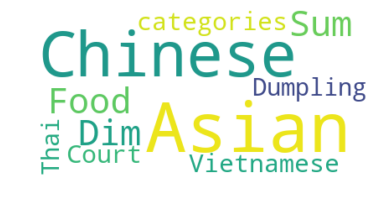

In [154]:
stopwords = set(STOPWORDS)

# instantiate a word cloud object
Downtown_CUISINE_WC = WordCloud(
    background_color='white',
    max_words=500,
    stopwords=stopwords
)

# generate the word cloud
Downtown_CUISINE_WC.generate(CUISINE_WC1)



# display the word cloud
plt.imshow(Downtown_CUISINE_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()


From the wordcloud result of overall downtown, toronto, it looks like Chinese food and Asian food are most popular among the population. but when we analyze the sample that we picked the results are completely different. Please see below for description

## Checking postecode M5V surrondings with respect to food popularity 

In [156]:
nearby_venues_sample = nearby_venues['categories']=nearby_venues['categories'].replace(to_replace='Restaurant', value='', regex=True)
nearby_venues_sample = pd.DataFrame(nearby_venues_sample)
nearby_venues_sample

,categories
0,Dessert Shop
1,Sandwich Place
2,Mexican
3,Seafood
4,Spanish
5,Steakhouse
6,French
7,Italian
8,Spa
9,Gym


In [158]:
nearby_venues_sample.to_csv('nearby_venues_sample.txt', sep=',', index=False)
nearby_venues_sample_1 = open('nearby_venues_sample.txt', 'r').read()

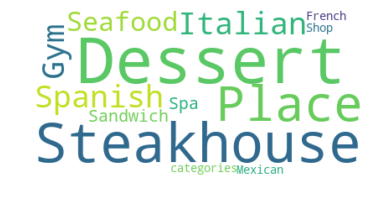

In [159]:
stopwords = set(STOPWORDS)

# instantiate a word cloud object
Downtown_CUISINE_WC = WordCloud(
    background_color='white',
    max_words=500,
    stopwords=stopwords
)

# generate the word cloud
Downtown_CUISINE_WC.generate(nearby_venues_sample_1)



# display the word cloud
plt.imshow(Downtown_CUISINE_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

From the analysis of our sample, it is clear that there is no asian eat out in the surrondingd of Spice Route Asian Bistro + Bar;postcode M5V IK4. So it would be a wonderful opportunity for my client to open an Asian food outlet here in this area.